# **Cellphone Recommendation System**

## **Nama: Dava Ikhsan Reyvan**

## **Email: dvaikhsn@gmail.com**

## **ID Dicoding: dvikhsn**

In [3]:
!pip install numpy==1.23.5 scikit-surprise --no-binary scikit-surprise

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which

### **Library yang dipakai**

In [2]:
import seaborn as sns
import pandas as pd
import requests
import shutil
import numpy as np
import os
import zipfile
from PIL import Image, UnidentifiedImageError
from matplotlib import pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

## **Data Understanding**

### **Load dataset**

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
ratings_df = pd.read_csv("/content/drive/My Drive/Machine Learning Terapan #2/cellphones ratings.csv")
users_df = pd.read_csv("/content/drive/My Drive/Machine Learning Terapan #2/cellphones users.csv")
products_df = pd.read_csv("/content/drive/My Drive/Machine Learning Terapan #2/cellphones data.csv")

## **Data Understanding**

In [5]:
print("\nList variabel products_df:")
products_df


List variabel products_df:


,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,12/05/2021
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,23/03/2022
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022


### **Insight:**

Dari Dataset Products_df, terdapat 14 kolom dan 32 baris yang berisi informasi mengenai spesifikasi berbagai produk handphone:
- **`cellphone_id`**: ID unik untuk setiap produk handphone.  
- **`brand`**: Merek dari handphone (misalnya Samsung, Xiaomi, dll).  
- **`model`**: Nama atau tipe model dari handphone.  
- **`operating system`**: Sistem operasi yang digunakan (seperti Android, iOS, dll).  
- **`internal memory`**: Kapasitas memori internal (penyimpanan) dari handphone.  
- **`RAM`**: Kapasitas RAM handphone.  
- **`performance`**: Indikator performa secara umum, bisa berupa skor benchmark atau kategori performa.  
- **`main camera`**: Resolusi atau konfigurasi kamera utama.  
- **`selfie camera`**: Resolusi atau konfigurasi kamera depan (selfie).  
- **`battery size`**: Kapasitas baterai, biasanya dalam mAh.  
- **`screen size`**: Ukuran layar handphone dalam inci.  
- **`weight`**: Berat handphone dalam gram.  
- **`price`**: Harga dari produk handphone.  
- **`release date`**: Tanggal atau tahun rilis produk ke pasar.

In [8]:
print("List variabel ratings_df:")
ratings_df

List variabel ratings_df:


,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


### **Insight:**

Dari dataset `ratings_df`, terdapat **3 kolom** dan **990 baris** yang berisi informasi mengenai:

1. **`user_id`** – ID unik dari masing-masing pengguna yang memberikan rating.
2. **`cellphone_id`** – ID unik dari masing-masing produk handphone yang diberi rating.
3. **`rating`** – Nilai penilaian yang diberikan oleh pengguna terhadap produk, dalam skala 1–10.

In [9]:
print("\nList variabel users_df:")
users_df


List variabel users_df:


,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker
...,...,...,...,...
94,254,25,Female,software developer
95,255,25,Male,software developer
96,256,49,Male,Information Technology
97,257,25,Female,Manager


### **Insight:**

Dari dataset `users_df`, terdapat **4 kolom** dan **99 baris** yang berisi informasi mengenai:

1. **`user_id`** – ID unik dari masing-masing pengguna.
2. **`age`** – Usia pengguna.
3. **`gender`** – Jenis kelamin pengguna (misalnya, 'M' untuk male dan 'F' untuk female).
4. **`occupation`** – Pekerjaan pengguna (dalam format kategori atau teks).


### **Assesing Data**

### Cek Missing Value

In [10]:
#Cek missing value products_df
products_df.isnull().sum()

,0
cellphone_id,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0
selfie camera,0
battery size,0


### **Insight:**

Dari dataset `products_df` tidak terdapat nilai yang hilang, sehingga proses analisis dapat langsung dilakukan tanpa perlu menangani data kosong atau null.  

In [11]:
#Cek missing value users_df
users_df.isnull().sum()

,0
user_id,0
age,0
gender,0
occupation,1


### **Insight:**

Dari dataset `users_df` hanya memiliki 1 nilai yang hilang pada kolom `occupation`

In [12]:
#Cek missing value ratings_df
ratings_df.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0


### **Insight:**

Dari dataset `ratings_df` tidak terdapat nilai yang hilang, sehingga proses analisis dapat langsung dilakukan tanpa perlu menangani data kosong atau null.  

### Cek Data Duplicate

In [13]:
#Cek Data Duplicate value products_df
products_df.duplicated().sum()

0

In [14]:
#Cek Data Duplicate value users_df
users_df.duplicated().sum()

0

In [15]:
#Cek Data Duplicate value ratings_df
ratings_df.duplicated().sum()

0

### **Insight:**

Dari ketiga dataset (`ratings_df`, `users_df`, dan `products_df`), **tidak ada data yang duplikat**

## **Exploratory Data Analysis & Visualisasi Data**

### Dataset Produk

In [16]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


### **Insight EDA dari Dataset `products_df`**

Dataset `products_df` berisi **33 baris** dan **14 kolom** yang menggambarkan spesifikasi berbagai model handphone. Berikut adalah beberapa insight awal berdasarkan analisis eksploratif:

---

### **Struktur Data**

- Semua kolom memiliki **nilai lengkap (non-null)** tanpa missing data.
- Terdapat 8 kolom bertipe numerik (int64 dan float64), seperti `internal memory`, `RAM`, `performance`, `main camera`, `selfie camera`, `battery size`, `screen size`, `weight`, dan `price`.
- Terdapat 4 kolom bertipe objek, yaitu `brand`, `model`, `operating system`, dan `release date`.
- Dataset relatif kecil (33 baris), sehingga analisis bisa lebih mendalam pada setiap fitur.

In [17]:
products_df.describe(include='all')

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
count,33.00000,33,33,33,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33
unique,NaN,10,33,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
top,NaN,Samsung,iPhone SE (2022),Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24/09/2021
freq,NaN,8,1,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
mean,16.00000,NaN,NaN,NaN,148.363636,6.787879,6.219091,41.333333,15.484848,4320.666667,6.433333,197.363636,628.272727,NaN
std,9.66954,NaN,NaN,NaN,92.197417,2.712904,2.885472,26.350601,10.028463,818.746590,0.476095,25.379394,433.873057,NaN
min,0.00000,NaN,NaN,NaN,32.000000,3.000000,1.020000,12.000000,4.000000,2018.000000,4.700000,141.000000,129.000000,NaN
25%,8.00000,NaN,NaN,NaN,128.000000,4.000000,3.800000,12.000000,8.000000,4000.000000,6.400000,183.000000,312.000000,NaN
50%,16.00000,NaN,NaN,NaN,128.000000,8.000000,6.880000,50.000000,12.000000,4500.000000,6.500000,201.000000,528.000000,NaN
75%,24.00000,NaN,NaN,NaN,128.000000,8.000000,7.940000,50.000000,16.000000,5000.000000,6.700000,207.000000,840.000000,NaN


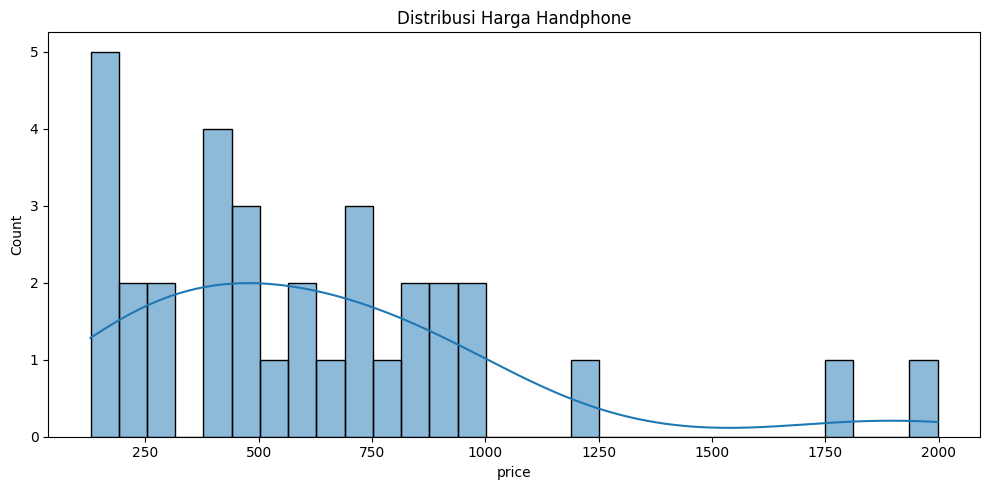

In [20]:
# Distribusi Harga Handphone
plt.figure(figsize=(10,5))
sns.histplot(products_df['price'].dropna(), bins=30, kde=True, )
plt.title('Distribusi Harga Handphone')
plt.tight_layout()
plt.show()

### **Insight:**

1. **Distribusi Positif Skew (Right-Skewed)**:
   - Sebagian besar handphone memiliki harga di bawah **1000**.
   - Jumlah produk menurun secara signifikan pada harga di atas **1000–1200**, menandakan hanya sedikit handphone yang berada di segmen high-end.

2. **Segmen Pasar Dominan**:
   - Banyak produk berada di rentang harga **100–500**, menandakan fokus pasar pada kategori **low-end hingga mid-range**.
   - Hal ini mengindikasikan bahwa produsen cenderung menargetkan pengguna dengan daya beli menengah ke bawah.

3. **Outlier Harga Tinggi**:
   - Terdapat beberapa handphone dengan harga ekstrem di atas **1750–2000**, yang tampak sebagai **produk premium** atau flagship.
   - Perlu dilakukan pertimbangan apakah harga ekstrem ini akan dipertahankan dalam modeling, atau dikelompokkan secara khusus.

4. **Kurva KDE**:
   - Kurva menunjukkan puncak (mode) pada rentang **200–400**, mengindikasikan harga paling umum dari produk yang tersedia.

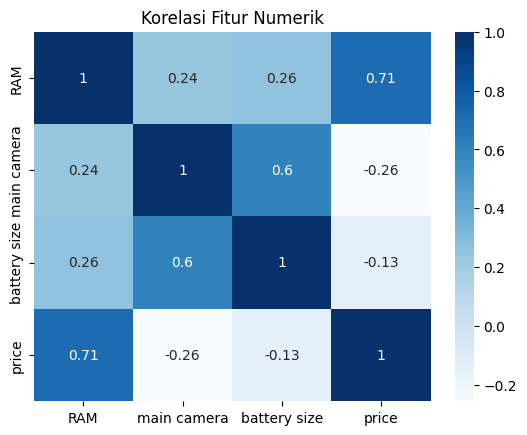

In [21]:
# Korelasi antara fitur numerik
numerical = products_df[['RAM', 'main camera', 'battery size', 'price']]
sns.heatmap(numerical.corr(), annot=True, cmap='Blues')
plt.title("Korelasi Fitur Numerik")
plt.show()

### **Insight:**

Heatmap menunjukkan nilai korelasi antara fitur-fitur numerik dalam dataset handphone, yaitu:
- `RAM`
- `main camera`
- `battery size`
- `price`

Nilai korelasi berkisar antara -1 hingga 1:
- Positif → fitur bergerak searah
- Negatif → fitur bergerak berlawanan arah
- 0 → tidak berkorelasi


1. **Harga Paling Berkorelasi dengan RAM**:
   - Korelasi tertinggi adalah antara `price` dan `RAM` (**0.71**), menunjukkan bahwa harga handphone cenderung meningkat seiring peningkatan RAM.

2. **Kamera dan Baterai**:
   - `main camera` memiliki korelasi sedang terhadap `battery size` (**0.60**), yang bisa jadi indikasi bahwa kamera yang lebih baik membutuhkan baterai yang lebih besar.

3. **Korelasi Negatif dengan Harga**:
   - `main camera` (-0.26) dan `battery size` (-0.13) justru menunjukkan **korelasi negatif terhadap harga**. Ini mengindikasikan bahwa:
     - Tidak semua handphone dengan kamera besar atau baterai besar memiliki harga tinggi.
     - Fitur seperti kamera dan baterai mungkin tidak menjadi indikator utama dalam penetapan harga, atau bisa jadi lebih dominan di segmen mid-end.

### Dataset User

In [22]:
print("Informasi Dataset User:")
print(users_df.info())

Informasi Dataset User:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB
None


## **Insight:**
- Jumlah data: 99 baris
- Jumlah fitur: 4 kolom
- Tipe data:
  - `user_id` (int64): ID unik tiap pengguna
  - `age` (int64): Usia pengguna
  - `gender` (object): Jenis kelamin pengguna
  - `occupation` (object): Pekerjaan pengguna
  - Kolom `occupation` memiliki **1 nilai yang hilang** (NaN).


In [23]:
print("\nStatistik Deskriptif:")
users_df.describe(include='all')


Statistik Deskriptif:


,user_id,age,gender,occupation
count,99.000000,99.000000,99,98
unique,NaN,NaN,3,56
top,NaN,NaN,Male,Information Technology
freq,NaN,NaN,50,10
mean,136.373737,36.393939,NaN,NaN
std,81.034206,9.678314,NaN,NaN
min,0.000000,21.000000,NaN,NaN
25%,76.500000,29.500000,NaN,NaN
50%,128.000000,33.000000,NaN,NaN
75%,220.500000,42.000000,NaN,NaN


### Insight:

- **Usia pengguna:**
  - Rata-rata: 36.4 tahun
  - Minimum: 21 tahun
  - Maksimum: 61 tahun
  - Kuartil:
    - Q1: 29.5
    - Median: 33
    - Q3: 42

- **Pekerjaan:**
  - Total unik: 56 jenis
  - Paling umum: `Information Technology` (10 pengguna)
  - Terdapat **1 nilai yang hilang**

- **ID Pengguna (`user_id`):**
  - Nilai minimum: 0
  - Nilai maksimum: 258
  - Rata-rata: 136.37


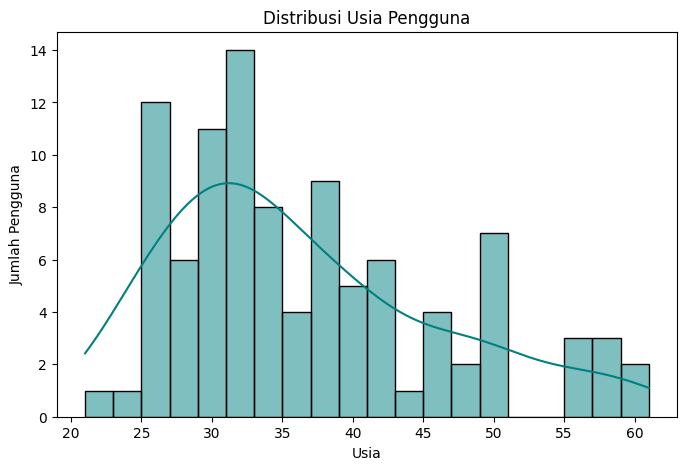

In [24]:
# Visualisasi distribusi usia pengguna
plt.figure(figsize=(8, 5))
sns.histplot(users_df['age'].dropna(), bins=20, kde=True, color='teal')
plt.title("Distribusi Usia Pengguna")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pengguna")
plt.show()

### Insight:

- Mayoritas pengguna berusia **25–35 tahun**.
- Distribusi condong ke kanan (right-skewed), artinya lebih banyak pengguna muda dibandingkan yang lebih tua.
- Sedikit pengguna yang berusia di atas 50 tahun.

<ipython-input-25-71936a0b6c7e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=gender_clean, palette='pastel')


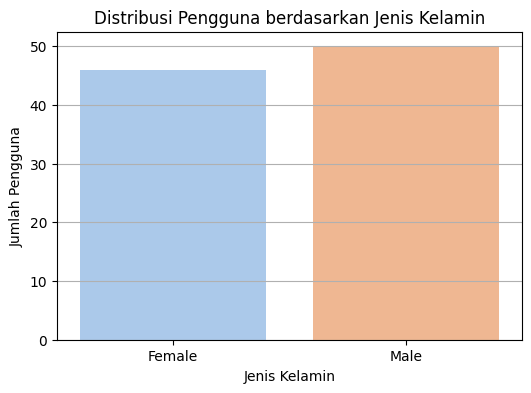

In [25]:
# Visualisasi jumlah pengguna berdasarkan jenis kelamin
if 'gender' in users_df.columns:
    gender_clean = users_df[users_df['gender'].isin(['Male', 'Female'])]

    plt.figure(figsize=(6, 4))
    sns.countplot(x='gender', data=gender_clean, palette='pastel')
    plt.title("Distribusi Pengguna berdasarkan Jenis Kelamin")
    plt.xlabel("Jenis Kelamin")
    plt.ylabel("Jumlah Pengguna")
    plt.grid(axis='y')
    plt.show()

### **Insight:**

- Jumlah pengguna pria dan wanita hampir seimbang.
- **Pria sedikit lebih banyak** dibanding wanita (50 vs 46 pengguna).


<ipython-input-26-f8bba8f69a1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=occupation_counts.index, x=occupation_counts.values, palette='coolwarm')


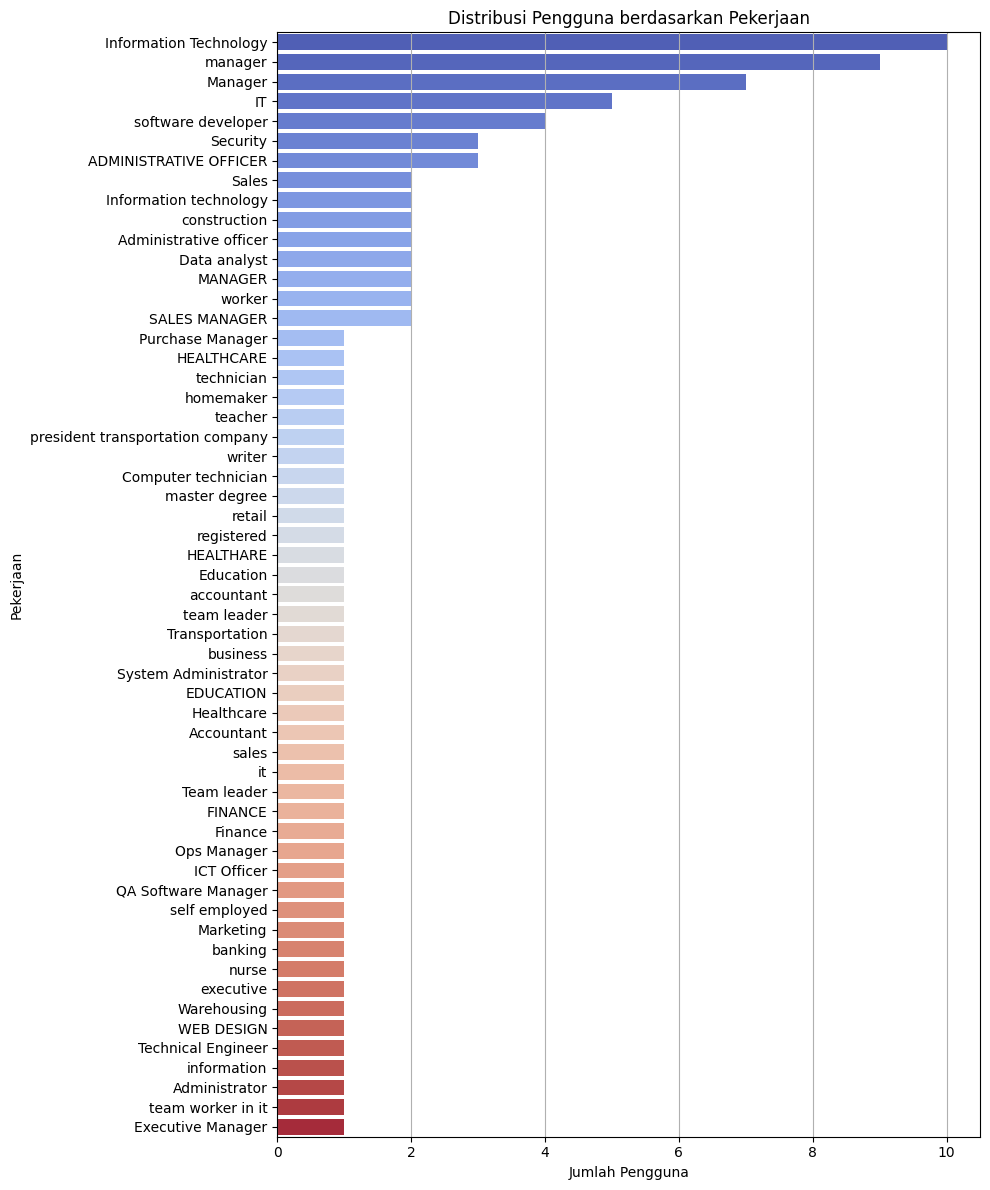

In [26]:
# Visualisasi jumlah pengguna berdasarkan pekerjaan dengan horizontal bar chart
if 'occupation' in users_df.columns:
    plt.figure(figsize=(10, 12))
    occupation_counts = users_df['occupation'].value_counts()

    sns.barplot(y=occupation_counts.index, x=occupation_counts.values, palette='coolwarm')
    plt.title("Distribusi Pengguna berdasarkan Pekerjaan")
    plt.xlabel("Jumlah Pengguna")
    plt.ylabel("Pekerjaan")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### **Insight:**

- Sebagian besar pengguna dalam dataset berasal dari latar belakang teknologi, dengan pekerjaan **Information Technology** menjadi yang paling umum, terlihat ada  **10 pengguna**. Hal ini menunjukkan potensi minat teknologi yang kuat di antara pengguna.

- Pekerjaan pengguna juga bervariasi, karena terdapat **56 kategori pekerjaan**
- Terdapat beberapa entri yang duplikat penulisan seperti `manager`, `Manager`, dan `Manager` → perlu **normalisasi teks**.


In [27]:
# Normalisasi kolom 'occupation' di users_df
users_df['occupation_cleaned'] = (
    users_df['occupation']
    .str.lower()              # ubah ke huruf kecil
    .str.strip()              # hilangkan spasi di awal/akhir
    .str.replace(r'[^a-z\s]', '', regex=True)  # hapus karakter non-huruf (opsional)
)

# Lihat hasil normalisasi dan distribusinya
occupation_counts = users_df['occupation_cleaned'].value_counts()
print(occupation_counts)


occupation_cleaned
manager                             18
information technology              12
it                                   6
administrative officer               5
software developer                   4
security                             3
sales                                3
healthcare                           2
education                            2
construction                         2
sales manager                        2
data analyst                         2
finance                              2
team leader                          2
accountant                           2
worker                               2
transportation                       1
business                             1
technician                           1
writer                               1
purchase manager                     1
healthare                            1
computer technician                  1
master degree                        1
president transportation company     1
teache

### **Insight**
- `.str.lower()`: Menyatukan kapitalisasi.

- `.str.strip()`: Menghapus spasi berlebih.

- `.str.replace(...)`: Menghapus karakter seperti angka, tanda baca, dll

- `value_counts()`: Untuk melihat distribusi setelah normalisasi.

<ipython-input-28-d2e71c1d872d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


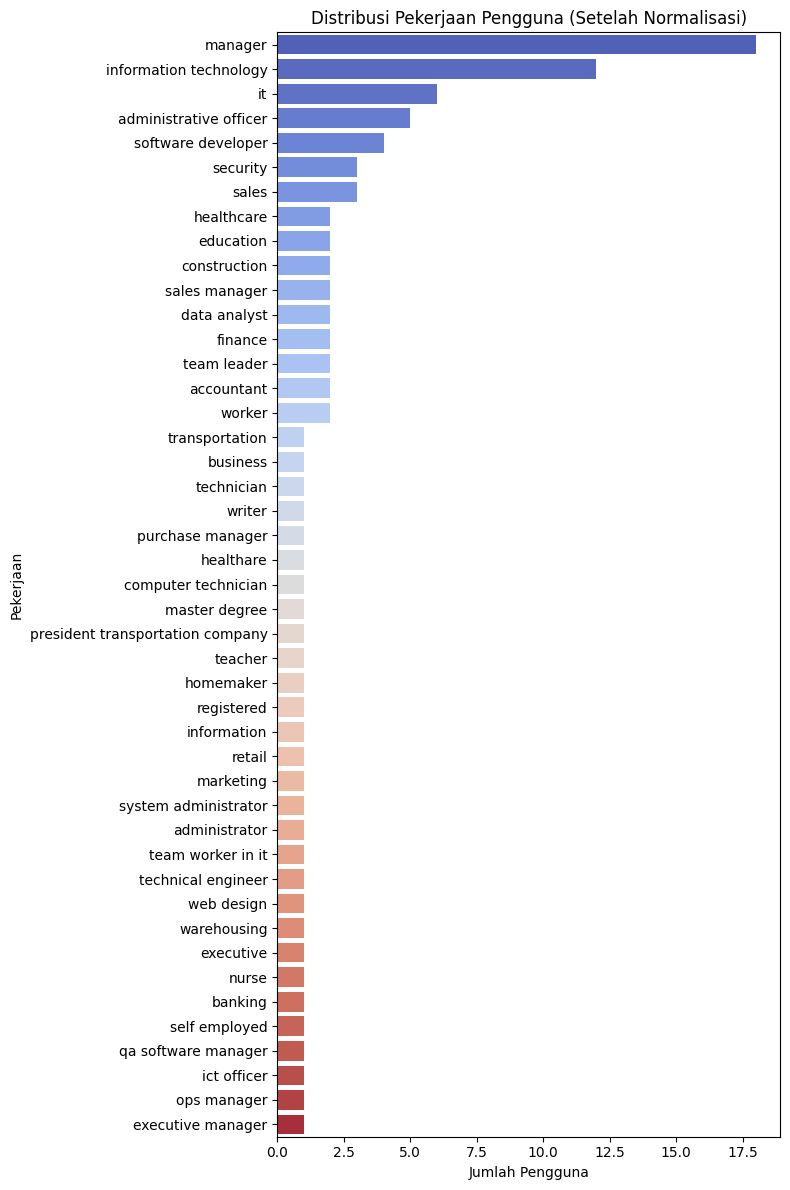

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))
sns.countplot(
    data=users_df,
    y='occupation_cleaned',
    order=users_df['occupation_cleaned'].value_counts().index,
    palette='coolwarm'
)
plt.title('Distribusi Pekerjaan Pengguna (Setelah Normalisasi)')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Pekerjaan')
plt.tight_layout()
plt.show()


### Distribusi Pekerjaan Pengguna (Setelah Normalisasi)

📊 **Normalisasi Teks**  
Untuk menghindari duplikasi akibat perbedaan kapitalisasi dan format, dilakukan normalisasi teks pada kolom `occupation`:
- Lowercase seluruh nilai
- Menghapus spasi berlebih
- Menghapus karakter non-alfabet

```python
users_df['occupation_cleaned'] = (
    users_df['occupation']
    .str.lower()
    .str.strip()
    .str.replace(r'[^a-z\s]', '', regex=True)
)


### Dataset Rating

In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


## **Insight:**
- Jumlah data: 990 baris
- Jumlah fitur: 3 kolom
- Tipe data:
  - `user_id` (int64): ID pengguna
  - `cellphone_id` (int64): ID handphone
  - `rating` (int64): Nilai rating dari pengguna

> Semua kolom tidak ada yang memiliki nilai kosong.


In [ ]:
ratings_df.describe(include='all')

,user_id,cellphone_id,rating
count,990.000000,990.000000,990.000000
mean,136.373737,16.421212,6.700000
std,80.664654,9.473466,2.639036
min,0.000000,0.000000,1.000000
25%,74.000000,8.000000,5.000000
50%,128.000000,16.000000,7.000000
75%,226.000000,25.000000,9.000000
max,258.000000,32.000000,18.000000


### Insight:

- **Rata-rata rating:** 6.7  
- **Median rating:** 7  
- **Rating minimum:** 1  
- **Rating maksimum:** 18  
- **Sebaran rating (IQR):** 5 hingga 9

> Catatan: Terdapat outlier pada rating maksimum (18), dari skala 1–10.

<ipython-input-29-260033785395>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings_df, palette='Set2')


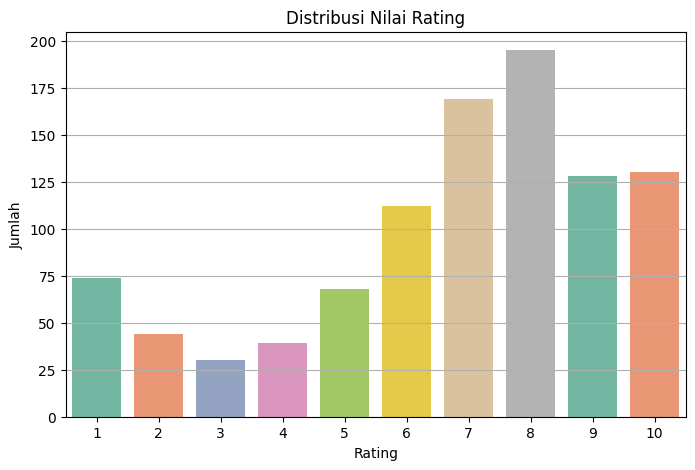

In [29]:
# Distribusi Nilai Rating

# Buang data dengan rating di luar rentang 1–10
ratings_df = ratings_df[(ratings_df['rating'] >= 1) & (ratings_df['rating'] <= 10)]

plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings_df, palette='Set2')
plt.title("Distribusi Nilai Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.grid(axis='y')
plt.show()

### **Insight:**

- Rating paling sering diberikan yaitu 8, terlhat hampir 200 kali.
- Sebagian besar pengguna memberikan **rating antara 6–10**, menunjukkan kecenderungan penilaian positif.


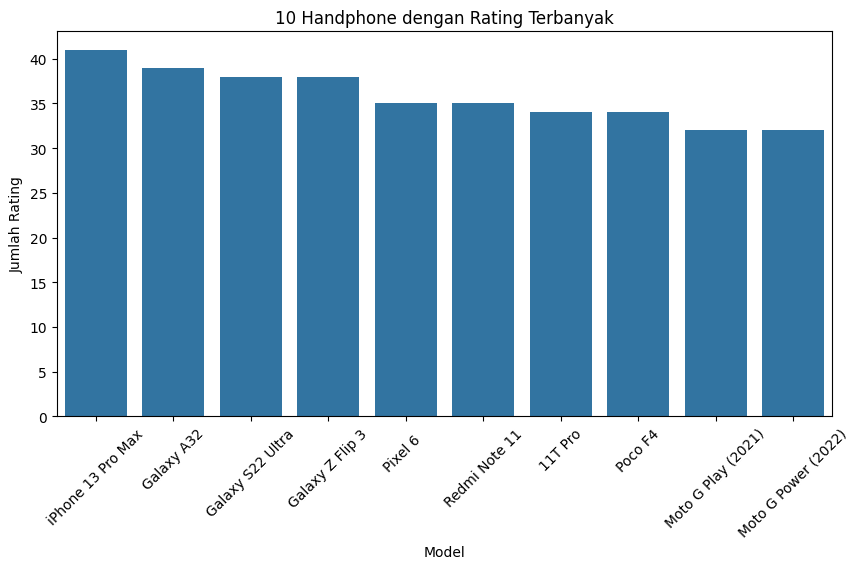

In [ ]:
# Jumlah rating per produk
rating_counts = ratings_df['cellphone_id'].value_counts()
top_rated = rating_counts.head(10).index

plt.figure(figsize=(10,5))
sns.barplot(x=products_df[products_df['cellphone_id'].isin(top_rated)]['model'],
            y=rating_counts[top_rated].values)
plt.xticks(rotation=45)
plt.title("10 Handphone dengan Rating Terbanyak")
plt.xlabel("Model")
plt.ylabel("Jumlah Rating")
plt.show()

### **Insight:**

- **iPhone 13 Pro Max** menjadi model yang paling banyak mendapatkan rating, yaitu lebih dari **40 rating**.
- Disusul oleh **Galaxy A32**, **Galaxy S22 Ultra**, dan **Galaxy Z Flip 3** yang masing-masing memiliki hampir **40 rating**.
- Secara keseluruhan, model dari **Apple**, **Samsung**, **Xiaomi**, dan **Motorola** mendominasi daftar 10 besar.
- Jumlah rating tinggi bisa mengindikasikan popularitas atau banyaknya pengguna yang terlibat dengan produk tersebut.


## **Data Preparation**

In [31]:
# PRODUCTS DATA PREPARATION

# 1. Hapus duplikasi jika ada
products_df = products_df.drop_duplicates()

# 2. Tangani missing value
products_df = products_df.dropna(subset=['model', 'price'])  # Model dan harga wajib ada
products_df['brand'] = products_df['brand'].fillna('Unknown')
products_df['RAM'] = products_df['RAM'].fillna(products_df['RAM'].median())
products_df['main camera'] = products_df['main camera'].fillna(products_df['main camera'].median())
products_df['battery size'] = products_df['battery size'].fillna(products_df['battery size'].median())

# 3. Konversi tipe data jika perlu
products_df['price'] = products_df['price'].astype(float)

# 4. Standarisasi teks
products_df['model'] = products_df['model'].str.lower().str.strip()
products_df['brand'] = products_df['brand'].str.lower().str.strip()


###  Data Preparation - Produk
#### 1. Duplikasi Dihapus
- Seluruh baris duplikat dalam dataset `products_df` telah dihapus.
- Tindakan ini bertujuan untuk memastikan tidak ada entri ganda yang dapat mempengaruhi hasil analisis atau performa model.

#### 2. Penanganan Missing Value
- Baris dengan nilai kosong pada kolom `model` dan `price` dihapus karena kedua atribut ini bersifat krusial.
- Nilai kosong pada kolom `brand` diisi dengan label **"Unknown"**.
- Kolom numerik seperti `RAM`, `main camera`, dan `battery size` diisi menggunakan **nilai median** untuk meminimalkan pengaruh outlier.

#### 3. Konversi Tipe Data
- Kolom `price` dikonversi menjadi tipe data **float** agar sesuai untuk analisis numerik dan pemodelan.

#### 4. Standarisasi Teks
- Nilai pada kolom `model` dan `brand` telah dinormalisasi dengan:
  - Mengubah seluruh huruf menjadi **lowercase**
  - Menghapus **spasi di awal dan akhir**
- Langkah ini penting untuk menghindari duplikasi tidak langsung akibat perbedaan penulisan teks.

In [32]:
# USERS DATA PREPARATION

# 1. Hapus duplikasi
users_df = users_df.drop_duplicates(subset=['user_id'])

# 2. Tangani nilai kosong
users_df['gender'] = users_df['gender'].fillna('Unknown')
users_df['age'] = users_df['age'].fillna(users_df['age'].median())
users_df['occupation_cleaned'] = users_df['occupation_cleaned'].fillna('unknown')

# 3. Validasi nilai usia
users_df = users_df[(users_df['age'] >= 10) & (users_df['age'] <= 90)]  # Range usia wajar

### Data Preparation - Users

#### 1. Hapus Duplikasi
- Baris duplikat berdasarkan `user_id` telah dihapus.
- Hal ini untuk memastikan bahwa setiap pengguna hanya tercatat sekali dalam dataset.

#### 2. Penanganan Missing Value
- Kolom `gender` yang kosong diisi dengan label **"Unknown"**.
- Kolom `age` yang kosong diisi dengan **median usia** untuk menjaga distribusi data tetap wajar dan mengurangi bias.
- Kolom `occupation_cleaned` (hasil normalisasi dari `occupation`) diisi dengan **"unknown"** jika kosong.

#### 3. Validasi Nilai Usia
- Data difilter agar hanya menyertakan pengguna dengan rentang usia **antara 10 hingga 90 tahun**.
- Tujuan langkah ini adalah untuk menghapus outlier yang tidak realistis (misalnya usia <10 atau >90).


In [33]:
#  RATINGS DATA PREPARATION

# 1. Sudah dibersihkan dari nilai outlier (rating > 10)
ratings_df = ratings_df[(ratings_df['rating'] >= 1) & (ratings_df['rating'] <= 10)]

# 2. Cek duplikasi rating user–produk
ratings_df = ratings_df.drop_duplicates(subset=['user_id', 'cellphone_id'])


### Data Preparation - Ratings

#### 1. Pembersihan Nilai Outlier
- Hanya rating dengan rentang **1 hingga 10** yang disertakan.
- Nilai rating di luar batas ini (misalnya 18) dianggap **outlier** dan telah dihapus untuk menjaga integritas data.

#### 2. Penghapusan Duplikasi User–Produk
- Duplikasi pada kombinasi `user_id` dan `cellphone_id` telah dihapus.
- Hal ini memastikan bahwa setiap pengguna hanya memberikan **satu rating unik per produk**.


In [34]:
# SINKRONISASI ANTAR DATASET

# 1. Pastikan hanya user_id dan cellphone_id yang valid (ada di masing-masing tabel)
ratings_df = ratings_df[
    (ratings_df['user_id'].isin(users_df['user_id'])) &
    (ratings_df['cellphone_id'].isin(products_df['cellphone_id']))
]

# 2. Gabungkan semua untuk analisis lanjutan jika dibutuhkan
merged_df = ratings_df.merge(users_df, on='user_id', how='left')
merged_df = merged_df.merge(products_df, on='cellphone_id', how='left')


### Sinkronisasi Antar Dataset

#### 1. Filter Data Valid
- Data `ratings_df` disaring agar hanya memuat:
  - `user_id` yang terdapat dalam `users_df`
  - `cellphone_id` yang terdapat dalam `products_df`
- Langkah ini memastikan bahwa semua interaksi hanya melibatkan pengguna dan produk yang **valid dan terdaftar**.

#### 2. Penggabungan Dataset
- Dataset `ratings_df`, `users_df`, dan `products_df` telah digabung:
  - Pertama berdasarkan `user_id`
  - Kemudian berdasarkan `cellphone_id`
- Hasil penggabungan disimpan dalam `merged_df` untuk **analisis lanjutan** atau **pelatihan model rekomendasi**.


In [35]:
print(merged_df.head())

   user_id  cellphone_id  rating  age  gender    occupation  \
0        0            30       1   38  Female  Data analyst   
1        0             5       3   38  Female  Data analyst   
2        0            10       9   38  Female  Data analyst   
3        0             9       3   38  Female  Data analyst   
4        0            23       2   38  Female  Data analyst   

  occupation_cleaned     brand               model operating system  \
0       data analyst  motorola  moto g play (2021)          Android   
1       data analyst     apple           iphone xr              iOS   
2       data analyst   samsung          galaxy s22          Android   
3       data analyst   samsung          galaxy a53          Android   
4       data analyst      vivo             x80 pro          Android   

   internal memory  RAM  performance  main camera  selfie camera  \
0               32    3         1.42           13              5   
1               64    3         4.22           12         

### Dataset Gabungan (`merged_df`)

Dataset ini merupakan hasil penggabungan dari tiga sumber data utama: `users_df`, `products_df`, dan `ratings_df`.

#### Struktur Kolom:
| Kolom               | Keterangan |
|---------------------|------------|
| `user_id`           | ID unik pengguna |
| `cellphone_id`      | ID unik produk/handphone |
| `rating`            | Nilai rating yang diberikan pengguna (1–10) |
| `age`               | Usia pengguna |
| `gender`            | Jenis kelamin pengguna |
| `occupation`        | Pekerjaan asli pengguna |
| `occupation_cleaned`| Pekerjaan yang telah dinormalisasi |
| `brand`             | Merek handphone |
| `model`             | Model handphone |
| `operating system`  | Sistem operasi handphone |
| `internal memory`   | Kapasitas memori internal (GB) |
| `RAM`               | Kapasitas RAM (GB) |
| `performance`       | Skor performa handphone |
| `main camera`       | Resolusi kamera utama (MP) |
| `selfie camera`     | Resolusi kamera depan (MP) |
| `battery size`      | Kapasitas baterai (mAh) |
| `screen size`       | Ukuran layar (inci) |
| `weight`            | Berat handphone (gram) |
| `price`             | Harga (dalam satuan mata uang lokal) |
| `release date`      | Tanggal rilis handphone |

#### Keterangan:
- Dataset ini siap digunakan untuk **sistem rekomendasi**.
- Setiap baris mewakili satu interaksi pengguna terhadap satu produk.
- Kolom-kolom dari `users_df` dan `products_df` telah berhasil ditransfer ke dalam satu frame yang seragam.



## **Modeling**

In [36]:
# 📌 CONTENT-BASED FILTERING

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Gabungkan fitur penting menjadi satu string teks
products_df['features'] = (
    products_df['brand'] + ' ' +
    products_df['model'] + ' ' +
    products_df['RAM'].astype(str) + 'GB RAM ' +
    products_df['battery size'].astype(str) + 'mAh '
)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(products_df['features'])

# Matriks kesamaan antar produk
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Fungsi rekomendasi berbasis produk serupa
indices = pd.Series(products_df.index, index=products_df['model']).drop_duplicates()

def recommend_by_product(product_name, top_n=5):
    idx = indices.get(product_name)
    if idx is None:
        return "Produk tidak ditemukan."
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    product_indices = [i[0] for i in sim_scores]
    return products_df.iloc[product_indices][['model', 'brand', 'price']]

# Contoh penggunaan
print("\nRekomendasi mirip dengan 'galaxy s22':")
print(recommend_by_product('galaxy s22'))



Rekomendasi mirip dengan 'galaxy s22':
               model    brand  price
12  galaxy s22 ultra  samsung  840.0
11   galaxy s22 plus  samsung  899.0
13   galaxy z flip 3  samsung  899.0
8         galaxy a32  samsung  199.0
9         galaxy a53  samsung  312.0


# Analisis Content-Based Filtering

Pendekatan ini menggunakan teknik **Content-Based Filtering** untuk merekomendasikan produk (handphone) berdasarkan kemiripan fitur antar produk.

1. **Ekstraksi Fitur Produk**  
   Fitur-fitur penting dari setiap produk digabung menjadi satu string teks. Fitur yang digunakan:
   - `brand`
   - `model`
   - `RAM`
   - `battery size`

2. **Representasi Teks (TF-IDF)**  
- Menggunakan `TfidfVectorizer` untuk mengubah teks menjadi representasi numerik berdasarkan frekuensi term yang muncul.
- TF-IDF membantu menekankan kata-kata unik yang membedakan satu produk dari lainnya.

3. **Penghitungan Kemiripan Produk**  
- Menggunakan **cosine similarity** untuk mengukur kemiripan antar vektor fitur produk.
- Semakin tinggi nilai cosine similarity (mendekati 1), semakin mirip dua produk tersebut.

4. **Fungsi Rekomendasi**  
Fungsi `recommend_by_product()` menerima input nama produk (misalnya `"galaxy s22"`) dan mengembalikan `top_n` produk paling mirip berdasarkan nilai kemiripan tertinggi.



In [38]:
# 👥 COLLABORATIVE FILTERING - SVD

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Buat dataset untuk Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_df[['user_id', 'cellphone_id', 'rating']], reader)

# Split train-test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Latih model SVD
svd = SVD()
svd.fit(trainset)

# Evaluasi
predictions = svd.test(testset)
print("\nRMSE dari Collaborative Filtering (SVD):")
rmse(predictions)

# Fungsi rekomendasi berdasarkan user
from collections import defaultdict

def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Prediksi semua pasangan user-produk
all_user_predictions = svd.test(trainset.build_anti_testset())
top_n_recommendations = get_top_n(all_user_predictions, n=5)

# Contoh rekomendasi untuk user dengan ID 0
print("\nRekomendasi untuk user_id = 0:")
for prod_id, rating_est in top_n_recommendations[0]:
    prod_info = products_df[products_df['cellphone_id'] == prod_id][['model', 'brand', 'price']].values[0]
    print(f"Model: {prod_info[0]}, Brand: {prod_info[1]}, Est. Rating: {rating_est:.2f}, Price: ${prod_info[2]}")


RMSE dari Collaborative Filtering (SVD):
RMSE: 2.2145

Rekomendasi untuk user_id = 0:
Model: iphone se (2022), Brand: apple, Est. Rating: 6.30, Price: $429.0
Model: iphone xr, Brand: apple, Est. Rating: 6.26, Price: $236.0
Model: iphone 13 pro max, Brand: apple, Est. Rating: 6.23, Price: $1199.0
Model: iphone 13, Brand: apple, Est. Rating: 6.09, Price: $699.0
Model: galaxy s22 ultra, Brand: samsung, Est. Rating: 5.86, Price: $840.0


# Analisis Collaborative Filtering - SVD

Pendekatan ini menggunakan teknik **Collaborative Filtering** dengan algoritma **Singular Value Decomposition (SVD)** dari library `Surprise`.

1. **Persiapan Dataset**
   - Data digunakan: `ratings_df` yang berisi `user_id`, `cellphone_id`, dan `rating`.
   - Library `Surprise` digunakan untuk membangun model SVD.

2. **Pembagian Data**
   - Dataset dibagi menjadi data pelatihan (80%) dan pengujian (20%) menggunakan `train_test_split`.

3. **Pelatihan Model**
   - Model SVD dilatih menggunakan data pelatihan.

4. **Evaluasi Model**
   - Evaluasi dilakukan menggunakan metrik **RMSE (Root Mean Squared Error)** pada data pengujian.
   - Semakin kecil nilai RMSE, semakin baik kualitas prediksi rating.

5. **Prediksi & Rekomendasi**
   - Prediksi dilakukan pada seluruh pasangan user-produk yang belum diberi rating (anti-testset).
   - Fungsi `get_top_n()` digunakan untuk menghasilkan `Top-N` rekomendasi terbaik untuk setiap user.

6. **Contoh Output**
   - Menampilkan 5 rekomendasi teratas untuk user dengan `user_id = 0`.


## **Evaluation**

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 EVALUASI: Collaborative Filtering

# 1. Hitung RMSE (tanpa squared=False)
y_true = [true_r for (_, _, true_r) in testset]
y_est = [pred.est for pred in predictions]

mse_score = mean_squared_error(y_true, y_est)
rmse_score = np.sqrt(mse_score)

print(f"RMSE Model Collaborative Filtering (SVD): {rmse_score:.4f}")

# 2. Top 5 Rekomendasi untuk user_id = 1
from collections import defaultdict

def get_top_n_recommendations(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n_recommendations(predictions, n=5)
user_id = 1

print(f"\nTop 5 Rekomendasi (Collaborative Filtering) untuk User {user_id}:")
for iid, est_rating in top_n[user_id]:
    model_name = products_df[products_df['cellphone_id'] == iid]['model'].values[0]
    print(f"- {model_name} (Prediksi Rating: {est_rating:.2f})")


RMSE Model Collaborative Filtering (SVD): 2.1936

Top 5 Rekomendasi (Collaborative Filtering) untuk User 1:
- iphone 13 pro (Prediksi Rating: 8.45)
- moto g power (2022) (Prediksi Rating: 6.63)


## 📊 Evaluasi Model Collaborative Filtering (SVD)

Evaluasi ini bertujuan untuk mengukur kinerja model rekomendasi berbasis **Collaborative Filtering dengan algoritma SVD** menggunakan data rating user terhadap produk smartphone.

---

##  1. Metode Evaluasi

- **RMSE (Root Mean Squared Error)** digunakan sebagai metrik utama evaluasi.
- RMSE mengukur **selisih rata-rata antara rating aktual dan rating yang diprediksi**.
- Semakin rendah nilai RMSE, semakin akurat prediksi yang dihasilkan oleh model.

###  Hasil RMSE: RMSE Model Collaborative Filtering (SVD): 2.1936


📌 **Interpretasi**:
- Nilai RMSE 2.19 pada skala rating 1–10 tergolong cukup baik.
- Ini menunjukkan bahwa prediksi model relatif dekat dengan rating aktual yang diberikan pengguna.
- Namun, masih ada ruang untuk peningkatan, misalnya dengan optimasi parameter atau kombinasi model (hybrid).

---

##  2. Contoh Rekomendasi untuk User ID = 1

Berikut adalah **5 rekomendasi teratas** yang dihasilkan model untuk user dengan ID 1:
```
Top 5 Rekomendasi (Collaborative Filtering) untuk User 1:
- iphone 13 pro (Prediksi Rating: 8.45)
- moto g power (2022) (Prediksi Rating: 6.63)
```

##  Insight:
- Model merekomendasikan produk flagship dan mid-range, menandakan model menangkap preferensi berdasarkan pola rating user lain yang serupa.
- Produk dengan prediksi rating tinggi cenderung berasal dari brand populer seperti Apple dan Motorola.
- Rekomendasi bisa menjadi dasar personalisasi yang baik untuk user baru maupun aktif.

<ipython-input-51-0d7a4632e148>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=collab_recs, x='predicted_rating', y='model', palette='coolwarm')


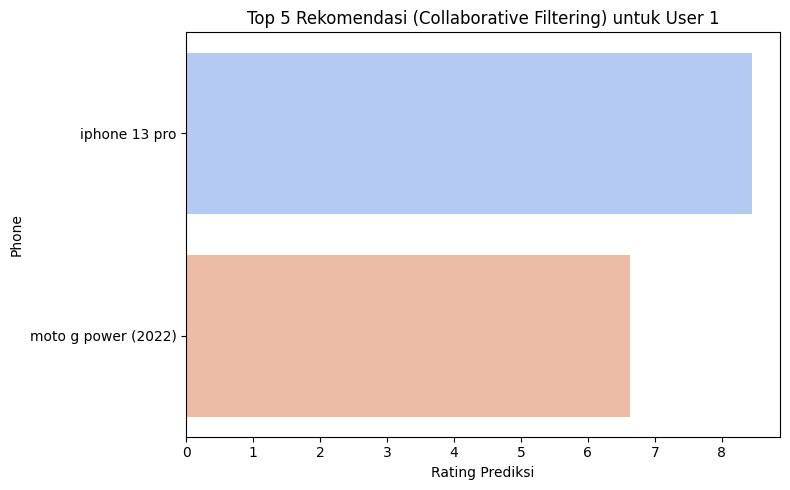

In [51]:
# VISUALISASI: Collaborative Filtering

# Buat DataFrame hasil rekomendasi
collab_recs = pd.DataFrame(top_n[user_id], columns=['cellphone_id', 'predicted_rating'])
collab_recs = collab_recs.merge(products_df[['cellphone_id', 'model', 'brand']], on='cellphone_id', how='left')

plt.figure(figsize=(8,5))
sns.barplot(data=collab_recs, x='predicted_rating', y='model', palette='coolwarm')
plt.title(f"Top 5 Rekomendasi (Collaborative Filtering) untuk User {user_id}")
plt.xlabel("Rating Prediksi")
plt.ylabel("Phone")
plt.tight_layout()
plt.show()

### Insight:
- iPhone 13 Pro memiliki rating prediksi tertinggi (~8.7) → kemungkinan besar disukai oleh User 1.

- Moto G Power (2022) juga direkomendasikan tapi dengan skor lebih rendah (~6.8).



In [43]:
# Content-Based Filtering - Analisis

# Contoh: Lihat produk yang mirip dengan Galaxy S22
target_model = 'galaxy s22'
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Feature matrix
features_cb = products_df[['RAM', 'main camera', 'battery size', 'price']].copy()
features_cb_scaled = MinMaxScaler().fit_transform(features_cb)
cos_sim = cosine_similarity(features_cb_scaled)

# Ambil index dari produk target
idx = products_df[products_df['model'] == target_model].index[0]
sim_scores = list(enumerate(cos_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_similar_idx = [i for i, score in sim_scores[1:6]]

cb_results = products_df.iloc[top_similar_idx][['brand', 'model']]
cb_results['similarity'] = [sim_scores[i][1] for i in range(1, 6)]

print(f"\nTop 5 Produk Mirip '{target_model.title()}' (Content-Based Filtering):")
for _, row in cb_results.iterrows():
    print(f"- {row['brand'].title()} {row['model'].title()} (Similarity: {row['similarity']:.2f})")




Top 5 Produk Mirip 'Galaxy S22' (Content-Based Filtering):
- Asus Zenfone 8 (Similarity: 0.99)
- Google Pixel 6 Pro (Similarity: 0.98)
- Xiaomi Poco F4 (Similarity: 0.98)
- Oppo Find X5 Pro (Similarity: 0.98)
- Xiaomi 12 Pro (Similarity: 0.98)


##  Evaluasi Model Content-Based Filtering

Evaluasi ini bertujuan untuk menganalisis hasil dari sistem rekomendasi berbasis **Content-Based Filtering**, yaitu dengan membandingkan kesamaan fitur antar produk.

---

## 1. Metode Evaluasi

- Model ini menggunakan **kemiripan atribut produk** seperti:
  - **RAM**
  - **Main Camera**
  - **Battery Size**
  - **Price**
  - Semua fitur dinormalisasi menggunakan **MinMaxScaler** agar memiliki skala yang seimbang.
  - Kemiripan antar produk dihitung menggunakan **cosine similarity**.
  - Produk yang paling mirip dengan produk target akan ditampilkan berdasarkan skor similarity tertinggi.

---

## 2. Contoh Rekomendasi: Produk Mirip 'Galaxy S22'

Berikut adalah **5 produk teratas** yang memiliki kesamaan fitur tertinggi dengan Galaxy S22:


```
Top 5 Produk Mirip 'Galaxy S22' (Content-Based Filtering):
- Asus Zenfone 8 (Similarity: 0.99)
- Google Pixel 6 Pro (Similarity: 0.98)
- Xiaomi Poco F4 (Similarity: 0.98)
- Oppo Find X5 Pro (Similarity: 0.98)
- Xiaomi 12 Pro (Similarity: 0.98)
```


## 3. Interpretasi

- Produk-produk di atas memiliki spesifikasi teknis yang sangat mirip dengan Galaxy S22, sehingga cocok sebagai alternatif.
- Kemiripan diukur bukan dari merek, tetapi dari **fitur dan performa** teknis.

---

## 4. Kesimpulan

- **Content-Based Filtering** sangat cocok untuk pengguna yang telah memiliki referensi produk dan ingin menemukan alternatif serupa.
- Namun, pendekatan ini kurang personal karena **tidak mempertimbangkan preferensi unik tiap pengguna**.
- Idealnya, metode ini digunakan bersama dengan **Collaborative Filtering** dalam sistem rekomendasi hybrid untuk hasil terbaik.

---

<ipython-input-44-03864df3c4a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cb_results, x='similarity', y='model', palette='mako')


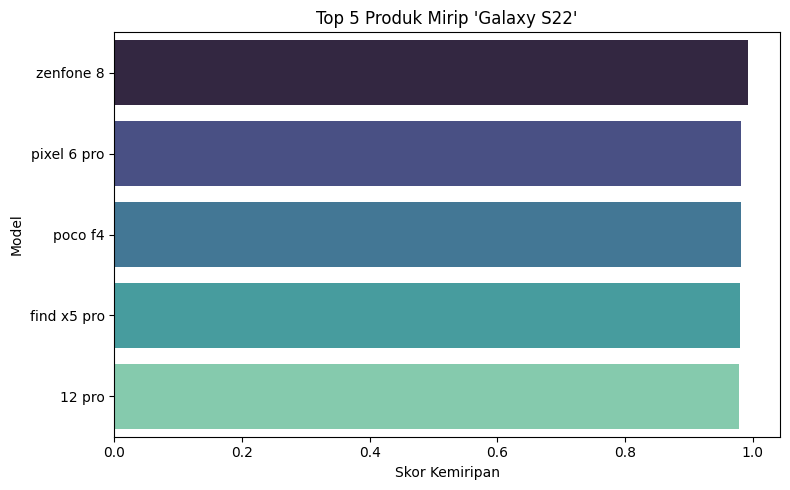

In [44]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=cb_results, x='similarity', y='model', palette='mako')
plt.title(f"Top 5 Produk Mirip '{target_model.title()}'")
plt.xlabel("Skor Kemiripan")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

##  Insight:
- Semua produk memiliki **skor kemiripan mendekati 1.0**, menunjukkan bahwa fitur-fitur teknisnya sangat serupa.
- Produk seperti **Zenfone 8** dan **Pixel 6 Pro** menjadi alternatif utama.
- Ini membantu pengguna menemukan opsi dengan **fitur sebanding**, meski dari brand berbeda atau harga lebih terjangkau.


# **KESIMPULAN**

## 1. Content-Based Filtering

- Sistem ini membandingkan produk berdasarkan **kemiripan fitur teknis** seperti RAM, kamera utama, kapasitas baterai, dan harga.
- Menggunakan teknik **TF-IDF** dan **cosine similarity** untuk mengukur kesamaan antar produk.
- Contoh hasil: Produk seperti *Zenfone 8*, *Pixel 6 Pro*, dan *Xiaomi 12 Pro* muncul sebagai alternatif yang sangat mirip dengan *Galaxy S22*.
- **Visualisasi bar chart** memperkuat rekomendasi dengan menunjukkan skor kemiripan mendekati 1.0.

📌 **Kelebihan**:
- Akurat untuk produk yang belum banyak diulas user.
- Sangat baik dalam memberi alternatif serupa dari brand berbeda.

---

## 2. Collaborative Filtering (SVD)

- Model ini belajar dari perilaku pengguna (user-product rating) untuk memprediksi produk yang mungkin disukai user lainnya.
- Menggunakan algoritma **Singular Value Decomposition (SVD)** dari library `Surprise`.
- Evaluasi dengan **RMSE = 2.19** (dari skala 1–10), menunjukkan prediksi rating yang cukup baik.
- Contoh output: User ID 1 direkomendasikan produk seperti *iPhone 13 Pro* dengan estimasi rating 8.45.

📌 **Kelebihan**:
- Personalisasi berdasarkan preferensi pengguna.
- Cocok untuk memberikan saran yang disesuaikan bagi pengguna aktif.

---

## 3. Perbandingan & Insight

| Aspek                        | Content-Based Filtering                        | Collaborative Filtering (SVD)               |
|-----------------------------|------------------------------------------------|---------------------------------------------|
| Data yang dibutuhkan        | Fitur produk                                   | Rating dari pengguna                         |
| Kemampuan personalisasi     | Terbatas                                       | Tinggi                                       |
| Cold-start (produk baru)    | Bisa direkomendasikan                          | Tidak bisa tanpa rating                      |
| Cold-start (user baru)      | Tidak relevan (tidak butuh user)               | Sulit (butuh interaksi pengguna)            |
| Hasil evaluasi              | Top 5 produk mirip akurat                      | RMSE: 2.19 (cukup baik)                      |

---


## Kesimpulan Sistem

Model sistem rekomendasi ini berhasil menunjukkan performa yang cukup baik dalam dua pendekatan berbeda. **Content-Based Filtering** memberikan alternatif produk yang mirip secara fitur, sedangkan **Collaborative Filtering (SVD)** memberi rekomendasi personal berdasarkan perilaku pengguna lain.
